Version:  2.4.1
Eager mode:  True
Hub version:  0.12.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is NOT AVAILABLE
Mounted at /content/drive
Note: using Google CoLab
total images for training : /content/drive/My Drive/NewDataset/train : 120files
total images for validation : /content/drive/My Drive/NewDataset/validation : 120files
['Bacterial_leaf_blight', 'Leaf Smut', 'brownspot']
Number of classes: 3
Using https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/2 with input size (299, 299) and output dimension 2048
Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
Building model with https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/2
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              21802784  
_______________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1/1 [==============================] - 82s 82s/step - loss: 1.0871 - accuracy: 0.5000 - val_loss: 1.0411 - val_accuracy: 0.3750
Epoch 2/10
1/1 [==============================] - 32s 32s/step - loss: 1.5103 - accuracy: 0.3594 - val_loss: 0.7134 - val_accuracy: 0.6875
Epoch 3/10
1/1 [==============================] - 32s 32s/step - loss: 0.8005 - accuracy: 0.6406 - val_loss: 1.4874 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 30s 30s/step - loss: 1.1951 - accuracy: 0.5893 - val_loss: 0.5447 - val_accuracy: 0.7344
Epoch 5/10
1/1 [==============================] - 30s 30s/step - loss: 0.6588 - accuracy: 0.6607 - val_loss: 0.0856 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 31s 31s/step - loss: 0.4695 - accuracy: 0.8750 - val_loss: 0.0747 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 30s 30s/step - loss: 0.8131 - accuracy: 0.7857 - val_loss: 0.1118 - val_accuracy: 0.9688
Epoch 8/10
1/1 [===========

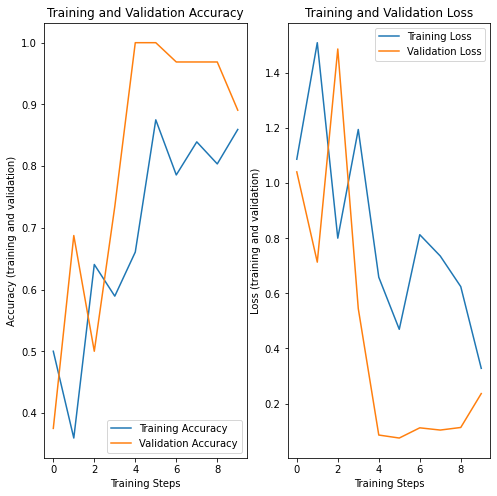

SOURCE: class: Brown spot, file: Brown spot/DSC_0307.JPG
PREDICTED: class: Leaf Smut, confidence: 0.515292


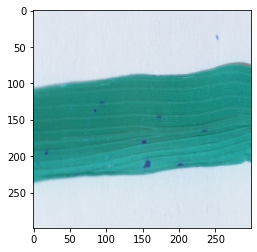

<Figure size 432x288 with 0 Axes>

SOURCE: class: Brown spot, file: Brown spot/DSC_0391.jpg
PREDICTED: class: Bacterial_leaf_blight, confidence: 0.594191


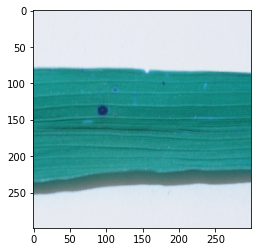

SOURCE: class: Leaf smut, file: Leaf smut/DSC_0336.jpg
PREDICTED: class: brownspot, confidence: 0.949699


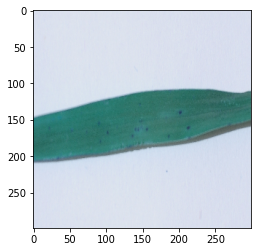

<Figure size 432x288 with 0 Axes>

SOURCE: class: Leaf smut, file: Leaf smut/DSC_0339.jpg
PREDICTED: class: brownspot, confidence: 0.987412


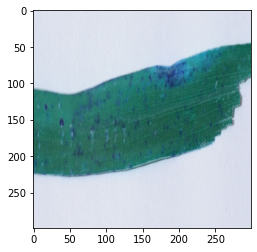

<Figure size 432x288 with 0 Axes>

SOURCE: class: Bacterial leaf blight, file: Bacterial leaf blight/DSC_0386.JPG
PREDICTED: class: Bacterial_leaf_blight, confidence: 0.994412


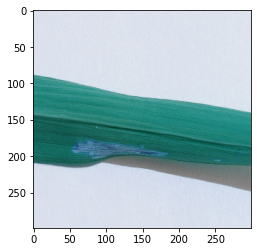

<Figure size 432x288 with 0 Axes>

SOURCE: class: Leaf smut, file: Leaf smut/DSC_0322.jpg
PREDICTED: class: brownspot, confidence: 0.984746


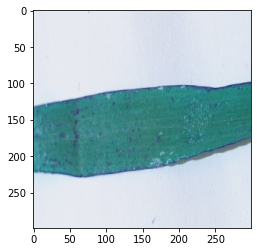

<Figure size 432x288 with 0 Axes>

SOURCE: class: Brown spot, file: Brown spot/DSC_0111.jpg
PREDICTED: class: Leaf Smut, confidence: 0.802956


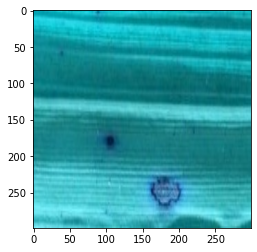

<Figure size 432x288 with 0 Axes>

SOURCE: class: Leaf smut, file: Leaf smut/DSC_0502.jpg
PREDICTED: class: brownspot, confidence: 0.941284


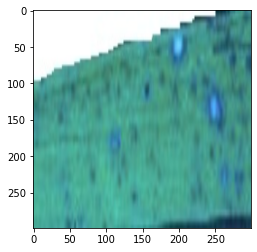

<Figure size 432x288 with 0 Axes>

SOURCE: class: Leaf smut, file: Leaf smut/DSC_0515.jpg
PREDICTED: class: Leaf Smut, confidence: 0.562440


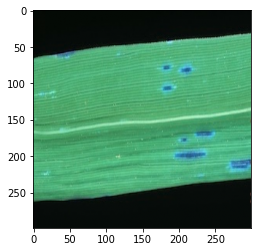

<Figure size 432x288 with 0 Axes>

SOURCE: class: Bacterial leaf blight, file: Bacterial leaf blight/DSC_0393.JPG
PREDICTED: class: Bacterial_leaf_blight, confidence: 0.956545


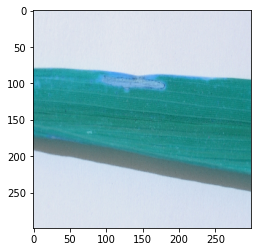

<Figure size 432x288 with 0 Axes>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf

import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras import optimizers

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")


try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False


data_dir = '/content/drive/My Drive/NewDataset'
train_dir = '/content/drive/My Drive/NewDataset/train'
validation_dir =   '/content/drive/My Drive/NewDataset/validation'



import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + "files"


print('total images for training :', count(train_dir))
print('total images for validation :', count(validation_dir))


classes = list({
  "Bacterial_leaf_blight": "Bacterial_leaf_blight",
  "Leaf Smut": "Leaf Smut",
  "brownspot": "brownspot"
})
    
print (classes)
print('Number of classes:',len(classes))


module_selection = ("inception_v3", 299, 2048)
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/2".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(
  MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

BATCH_SIZE = 64 


# Inputs are suitably resized for the selected module. Dataset augmentation (i.e., random distortions of an image each time it is read) improves training, esp. when fine-tuning.

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

do_data_augmentation = False #@param {type:"boolean"}
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest' )
else:
  train_datagen = validation_datagen
  
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)


feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE+(3,),
                                   output_shape=[FV_SIZE])


do_fine_tuning = False #@param {type:"boolean"}
if do_fine_tuning:
  feature_extractor.trainable = True
  # unfreeze some layers of base network for fine-tuning
  for layer in base_model.layers[-30:]:
    layer.trainable =True
  
else:
  feature_extractor.trainable = False




print("Building model with", MODULE_HANDLE)
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax',
                           kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
#model.build((None,)+IMAGE_SIZE+(3,))

model.summary()


#Compile model specifying the optimizer learning rate

LEARNING_RATE = 0.001 #@param {type:"number"}

model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['accuracy'])


EPOCHS=10 #@param {type:"integer"}

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)


import matplotlib.pylab as plt

import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()


import cv2

# Utility
import itertools
import random
from collections import Counter
from glob import iglob


def load_image(filename):
    img = cv2.imread(os.path.join(data_dir, validation_dir, filename))
    img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]))
    img = img /255
    
    return img


def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}


for idx, filename in enumerate(random.sample(validation_generator.filenames, 10)):
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    
    img = load_image(filename)
    prediction = predict(img)
    print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()    